Importing the required libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

Defnining the constants

In [9]:
dt = 0.000001

_time = np.arange(0, 1, dt)
_omega_o = 400 * np.pi
_omega_v = 2 * np.pi
_omega_delta = 10 * np.pi
_omega_t = _omega_o + _omega_delta * np.sin(_omega_v * _time)

_disp_t = _omega_t.cumsum() * dt # displacement in radians
_disp_t = np.rad2deg(_disp_t) # displacement in degrees

for idx, i in enumerate(_disp_t):
    if np.mod(i, 2*np.pi) == 0.:
        print(i, idx, np.mod(i, 2*np.pi), _time[idx])

In [10]:
_est = np.zeros(len(_time))

t1 = 0
_angle = np.zeros(len(_time))
previous = 0

for i in range(len(_time)):
    _angle = (_omega_t[i] + previous) * dt
    previous = _angle   

    if i == 0:
        _est[i] = 0
    if (np.mod(previous, np.rad2deg(2*np.pi)) ==0) and i != 0:
        print(_time[i] - t1, _disp_t[i], i)
        _est[i] = 2*np.rad2deg(np.pi)/(_time[i] - t1)
        t1 = _time[i]
        previous = 0
    else:
        _est[i] = _est[i-1]
    

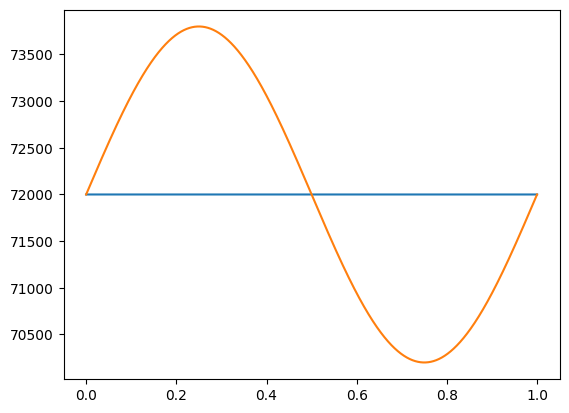

In [11]:
plt.plot(_time, _est/5 + 72000, label = 'actual')
plt.plot(_time, np.rad2deg(_omega_t))

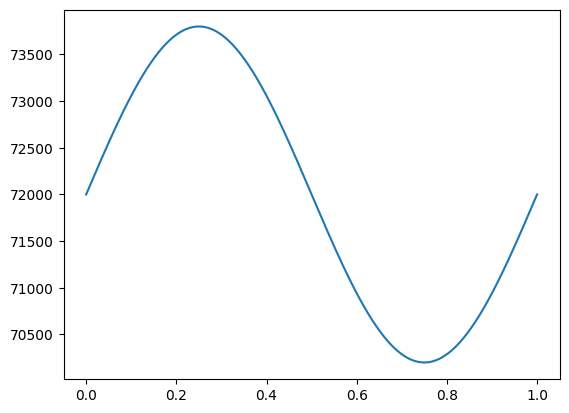

In [12]:
plt.plot(_time, np.rad2deg(_omega_t))

In [13]:
timea= 0
timeb=0
dist=0
tdist=0

time = np.linspace(0 , 5, 1000000)
omega = np.zeros(len(time))
est_speed = np.zeros(len(time))
phi = 3.14
omega = 400*phi + 10*phi*np.sin(2*phi*time)

for i in range(len(time)):
    dist=(time[i] -time[i-1])*omega[i] 
    tdist =tdist +dist 
    if i == 0:
        est_speed[i] = 0
    if (tdist %(2*phi) <= 0.012245) and i != 0:
        timeb=time[i] -timea
        timea=time[i] 
        est_speed[i]=phi*2/timeb 
        tdist=0 
    else:
        est_speed[i]=est_speed[i-1]

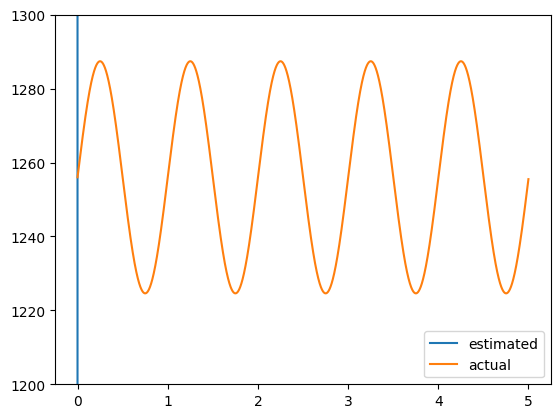

In [14]:
plt.plot(time, est_speed, label = 'estimated')
plt.plot(time, omega, label = 'actual')
plt.ylim(1200, 1300)
plt.legend()